In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [157]:
employee_data = pd.read_excel('data.xlsx')
employee_data.rename(columns={employee_data.columns[0]:'EmpId'}, inplace=True)
employee_data.head()

,EmpId,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,...,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,polarity,subjectivity,Sentiment
0,0,1,Accenture,Product based,1001,Yes,25,2,Female,Mumbai,...,4.0,4.0,4.0,4.0,1.0,Yes,Strict,0.700000,0.600000,1
1,1,2,Accenture,Product based,1002,No,56,4,Female,Pune,...,5.0,4.0,5.0,4.0,2.0,No,Flexible,0.666667,0.766667,1
2,2,3,Accenture,Product based,1003,Yes,24,1,Male,Mumbai,...,3.0,2.0,3.0,2.0,3.0,Yes,Strict,0.850000,0.787500,1
3,3,4,Accenture,Product based,1004,No,23,8,Female,Pune,...,1.0,2.0,2.0,1.0,1.0,Yes,Strict,-0.350000,0.755556,0
4,4,5,Accenture,Product based,1005,No,27,2,Female,Mumbai,...,1.0,1.0,1.0,2.0,2.0,No,Strict,-0.100000,0.833333,0


VALID NLP : number of decimal values in subjectivity 549


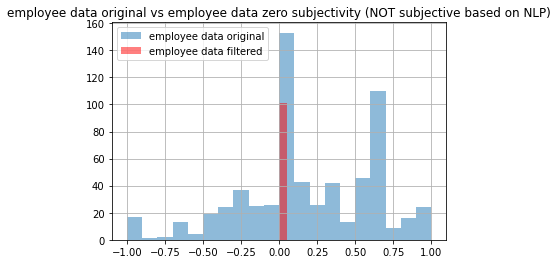

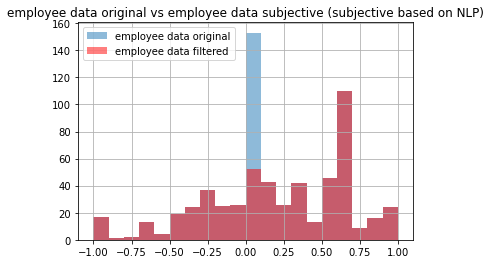

In [60]:
################### Data Filtering###################

# number of decimal values in subjectivity. only values between 0 and 1 and not 0 or 1
print('VALID NLP : number of decimal values in subjectivity', employee_data[(employee_data['subjectivity'] > 0)].shape[0])
# consider only the rows where subjectivity is not 0 or 1
employee_data_subjective = employee_data[(employee_data['subjectivity'] > 0)]
employee_data_zero_subjectivity = employee_data[(employee_data['subjectivity'] == 0)]

# compare histograms of df_original and df_zero_subjectivity
employee_data['polarity'].hist(bins=20, alpha=0.5, label='employee data original')
employee_data_zero_subjectivity['polarity'].hist(bins=20, alpha=0.5, label='employee data filtered', color='red')
plt.legend()
plt.title('employee data original vs employee data zero subjectivity (NOT subjective based on NLP)')
plt.show()

# compare histograms of df_original and df_neutral using same plot.
employee_data['polarity'].hist(bins=20, alpha=0.5, label='employee data original')
employee_data_subjective['polarity'].hist(bins=20, alpha=0.5, label='employee data filtered', color='red')
plt.legend()
plt.title('employee data original vs employee data subjective (subjective based on NLP)')
plt.show()

NEUTRAL : number of rows where polarity is between (-0.1, 0.1) 35
NON NEUTRAL : number of rows in employee_data_non_neutral 514


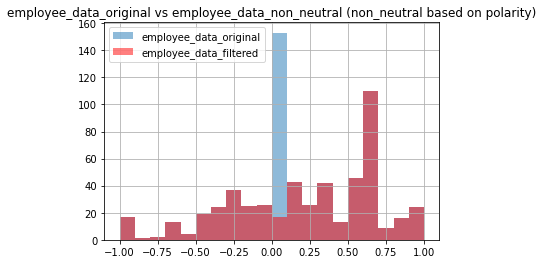

In [61]:
# get number of rows where polarity is between (-0.1, 0.1)
employee_data_neutral = employee_data_subjective[(employee_data_subjective['polarity'] > -0.01) & (employee_data_subjective['polarity'] < 0.01)]
print('NEUTRAL : number of rows where polarity is between (-0.1, 0.1)', employee_data_neutral.shape[0])

employee_data_non_neutral = employee_data_subjective[(employee_data_subjective['polarity'] < -0.01) | (employee_data_subjective['polarity'] > 0.01)]
# print number of rows in df_non_neutral
print('NON NEUTRAL : number of rows in employee_data_non_neutral', employee_data_non_neutral.shape[0])

# compare histograms of df_original and df_non_neutral using same plot.
employee_data['polarity'].hist(bins=20, alpha=0.5, label='employee_data_original')
employee_data_non_neutral['polarity'].hist(bins=20, alpha=0.5, label='employee_data_filtered', color='red')
plt.legend()
plt.title('employee_data_original vs employee_data_non_neutral (non_neutral based on polarity)')
plt.show()

FALSE NEGATIVE : rows where polarity is between (-0.5, -1) and Attrition is No 12


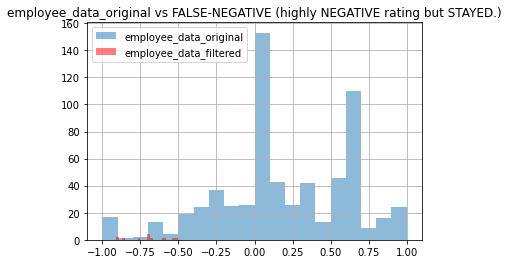

In [62]:
# False Negative
# get rows where polarity is between (-0.75, -1) and 'Attrition' is 'No'. name the variable as 'false_negative'.
false_negative = employee_data_non_neutral[(employee_data_non_neutral['polarity'] < -0.5) & (employee_data_non_neutral['polarity'] > -1) & (employee_data_non_neutral['Attrition'] == 'No')]
# print the shape of false_negative
print('FALSE NEGATIVE : rows where polarity is between (-0.5, -1) and Attrition is No', false_negative.shape[0])
# compare histograms of df_original and df_filtered using same plot.
employee_data['polarity'].hist(bins=20, alpha=0.5, label='employee_data_original')
false_negative['polarity'].hist(bins=20, alpha=0.5, label='employee_data_filtered', color='red')
plt.legend()
plt.title('employee_data_original vs FALSE-NEGATIVE (highly NEGATIVE rating but STAYED.)')
plt.show()

FALSE POSITIVE : rows where polarity is between (0.75, 1) and Attrition is Yes 9


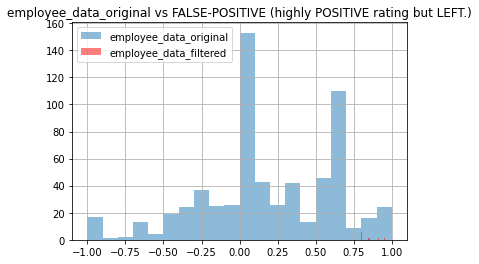

In [63]:
# false positive.
false_positive = employee_data_non_neutral[(employee_data_non_neutral['polarity'] > 0.75) & (employee_data_non_neutral['polarity'] < 1) & (employee_data_non_neutral['Attrition'] == 'Yes')]
# print the shape of false_positive
print('FALSE POSITIVE : rows where polarity is between (0.75, 1) and Attrition is Yes', false_positive.shape[0])
# compare histograms of df_original and df_filtered using same plot.
employee_data['polarity'].hist(bins=20, alpha=0.5, label='employee_data_original')
false_positive['polarity'].hist(bins=20, alpha=0.5, label='employee_data_filtered', color='red')
plt.legend()
plt.title('employee_data_original vs FALSE-POSITIVE (highly POSITIVE rating but LEFT.)')
plt.show()

shape of employee_data_filtered (594, 25)


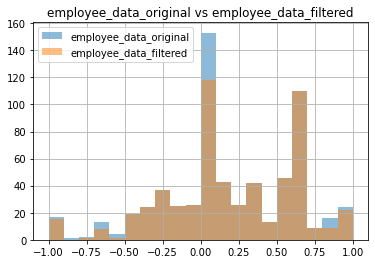

In [65]:
# drop df_neutral, false_negative, false_positive rows from df_original and call it df_filtered
employee_data_filtered = employee_data.drop(employee_data_neutral.index)
employee_data_filtered = employee_data_filtered.drop(false_negative.index)
employee_data_filtered = employee_data_filtered.drop(false_positive.index)
# print the shape of df_filtered
print('shape of employee_data_filtered', employee_data_filtered.shape)
# compare histograms of df_original and df_filtered using same plot.
employee_data['polarity'].hist(bins=20, alpha=0.5, label='employee_data_original')
employee_data_filtered['polarity'].hist(bins=20, alpha=0.5, label='employee_data_filtered')
plt.legend()
plt.title('employee_data_original vs employee_data_filtered')
plt.show()

In [166]:
employee_data_filtered.isnull().sum()

EmpId                     0
Sr.No                     0
Companyname               0
Companytype               0
EmployeeID                0
Attrition                 0
EmployeeAge               0
YearsAtCompany            0
Gender                    0
location                  0
EmployeeDepartment        0
JobRole                   0
Review                    0
Careergrowth              0
Jobsecurity               0
Worklifebalance           0
SkillDevelopment          0
Companyculture            0
WorkSatisfaction          0
Salaryandbenefits         0
OverTime                  0
Worktimingsatisfaction    0
polarity                  0
subjectivity              0
Sentiment                 0
left                      0
dtype: int64

In [67]:
employee_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 649
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpId                     594 non-null    int64  
 1   Sr. No                    594 non-null    int64  
 2   Company name              594 non-null    object 
 3   Company type              594 non-null    object 
 4   Employee ID               594 non-null    int64  
 5   Attrition                 594 non-null    object 
 6   Employee Age              594 non-null    int64  
 7   YearsAtCompany            594 non-null    int64  
 8   Gender                    594 non-null    object 
 9   location                  594 non-null    object 
 10  Employee Department       594 non-null    object 
 11  Job Role                  594 non-null    object 
 12  Review                    591 non-null    object 
 13  Career growth             592 non-null    float64
 14  Job securi

In [68]:
employee_data_filtered.describe()

,EmpId,Sr. No,Employee ID,Employee Age,YearsAtCompany,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,polarity,subjectivity,Sentiment
count,594.000000,594.000000,594.000000,594.000000,594.000000,592.000000,592.000000,591.000000,592.000000,593.000000,593.000000,593.000000,594.000000,594.000000,594.000000
mean,320.301347,321.303030,1315.424242,34.537037,3.791246,3.086149,3.548986,3.333333,3.336149,3.428331,2.989882,3.037099,0.203538,0.476281,0.271044
std,186.913030,186.915946,185.306487,7.960027,3.016569,1.376996,1.392863,1.402983,1.294336,1.348926,1.394935,1.336332,0.436742,0.287880,0.444873
min,0.000000,1.000000,1001.000000,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,160.250000,161.250000,1154.250000,28.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,-0.043750,0.300000,0.000000
50%,315.500000,316.500000,1309.500000,33.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,0.175000,0.567424,0.000000
75%,480.750000,481.750000,1474.750000,40.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,0.600000,0.627679,1.000000
max,649.000000,650.000000,1643.000000,60.000000,27.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000


In [69]:
employee_data_filtered.columns = employee_data_filtered.columns.str.replace(' ', '')
employee_data_filtered["Attrition"] = np.where(employee_data_filtered["Attrition"] == "Yes",'Yes','No')
employee_data_filtered["left"] = np.where(employee_data_filtered["Attrition"] == "Yes",1,0)
employee_data_filtered["Companytype"] = np.where(employee_data_filtered["Companytype"] == "Product based",'Product Based','Service Based')
employee_data_filtered["Worktimingsatisfaction"] = np.where(employee_data_filtered["Worktimingsatisfaction"] == "Flexible",'Flexible','Strict')
employee_data_filtered.head()

,EmpId,Sr.No,Companyname,Companytype,EmployeeID,Attrition,EmployeeAge,YearsAtCompany,Gender,location,...,SkillDevelopment,Companyculture,WorkSatisfaction,Salaryandbenefits,OverTime,Worktimingsatisfaction,polarity,subjectivity,Sentiment,left
0,0,1,Accenture,Service Based,1001,Yes,25,2,Female,Mumbai,...,4.0,4.0,4.0,1.0,Yes,Strict,0.700000,0.600000,1,1
1,1,2,Accenture,Service Based,1002,No,56,4,Female,Pune,...,4.0,5.0,4.0,2.0,No,Flexible,0.666667,0.766667,1,0
3,3,4,Accenture,Service Based,1004,No,23,8,Female,Pune,...,2.0,2.0,1.0,1.0,Yes,Strict,-0.350000,0.755556,0,0
4,4,5,Accenture,Service Based,1005,No,27,2,Female,Mumbai,...,1.0,1.0,2.0,2.0,No,Strict,-0.100000,0.833333,0,0
5,5,6,Accenture,Service Based,1006,No,25,7,Female,Bangalore,...,4.0,5.0,4.0,2.0,No,Flexible,0.175000,0.600000,0,0


In [83]:
#employee_data_filtered.columns[employee_data_filtered.isna().any()]
#employee_data_filtered.loc[:, employee_data_filtered.isna().any()]
#employee_data_filtered.isna()
nan_rows  = employee_data_filtered[employee_data_filtered.isna().any(axis=1)]
print(nan_rows)
employee_data_filtered.dropna(axis=0,inplace=True)
employee_data_filtered.shape

Empty DataFrame
Columns: [EmpId, Sr.No, Companyname, Companytype, EmployeeID, Attrition, EmployeeAge, YearsAtCompany, Gender, location, EmployeeDepartment, JobRole, Review, Careergrowth, Jobsecurity, Worklifebalance, SkillDevelopment, Companyculture, WorkSatisfaction, Salaryandbenefits, OverTime, Worktimingsatisfaction, polarity, subjectivity, Sentiment, left]
Index: []

[0 rows x 26 columns]


(586, 26)

In [84]:
employee_data_filtered['Companyculture'].unique()

array([4., 5., 2., 3., 1.])

In [85]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [86]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

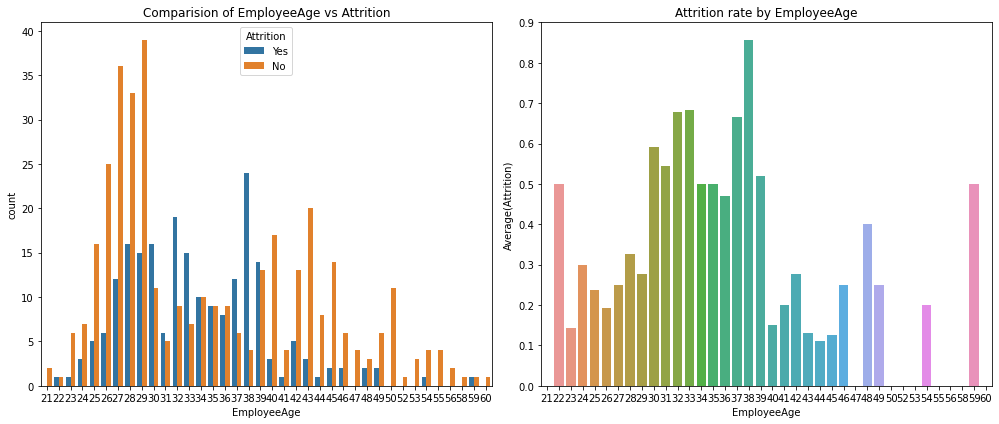

In [150]:
CategoricalVariables_targetPlots(employee_data_filtered,segment_by="EmployeeAge")

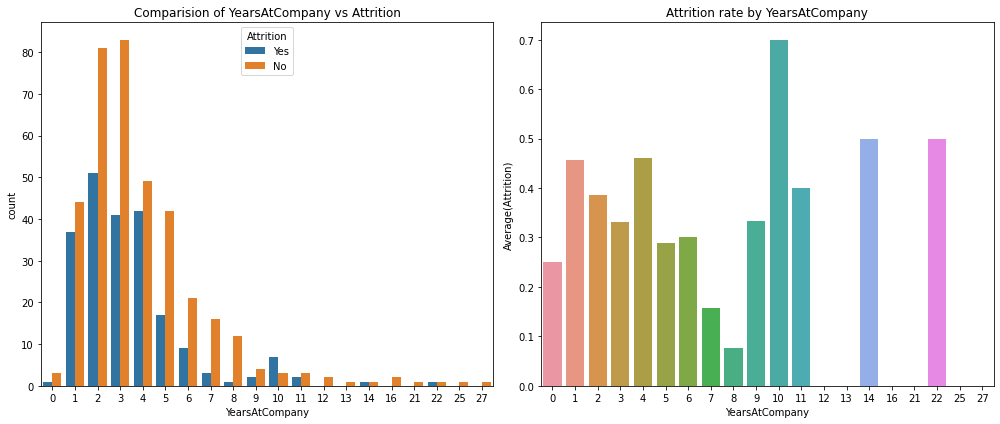

In [89]:
CategoricalVariables_targetPlots(employee_data_filtered,segment_by="YearsAtCompany")

In [13]:
#NumericalVariables_targetPlots(employee_data,segment_by="Careergrowth")


In [14]:
#NumericalVariables_targetPlots(employee_data,segment_by="Jobsecurity")

In [15]:
#NumericalVariables_targetPlots(employee_data,segment_by="Worklifebalance")

In [16]:
#NumericalVariables_targetPlots(employee_data,segment_by="SkillDevelopment")

In [17]:
#NumericalVariables_targetPlots(employee_data,segment_by="Companyculture")

In [18]:
#NumericalVariables_targetPlots(employee_data,"WorkSatisfaction")

In [19]:
#NumericalVariables_targetPlots(employee_data,"Salaryandbenefits")

In [20]:
#NumericalVariables_targetPlots(employee_data,"OverTime")

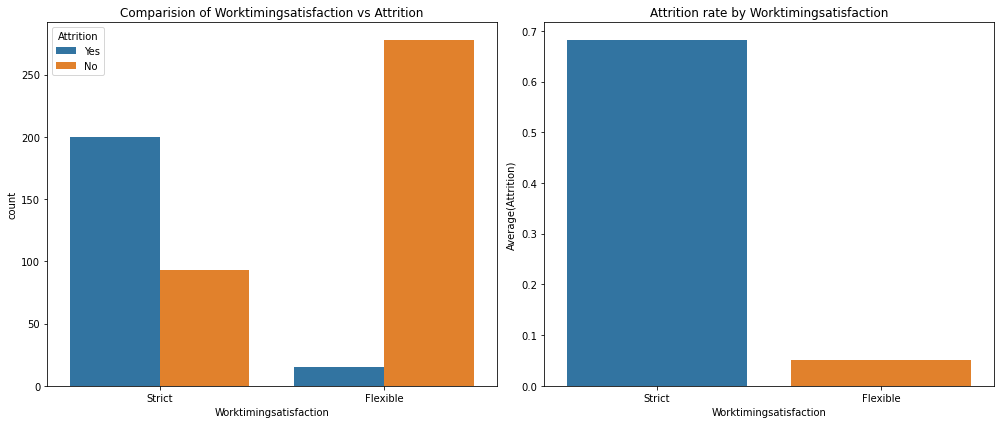

In [90]:
CategoricalVariables_targetPlots(employee_data_filtered,"Worktimingsatisfaction")

In [93]:
#employee_data_filtered.EmployeeDepartment.value_counts()

In [23]:
#CategoricalVariables_targetPlots(employee_data,"EmployeeDepartment",invert_axis=True)

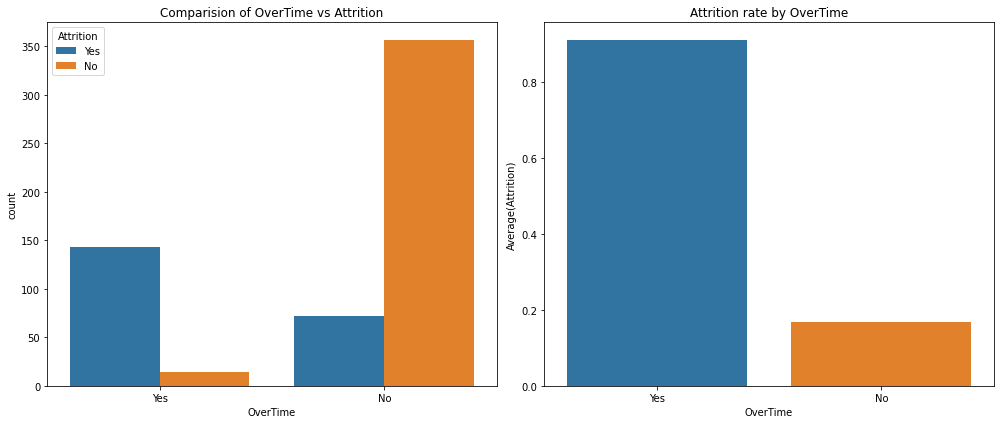

In [94]:
CategoricalVariables_targetPlots(employee_data_filtered,"OverTime")

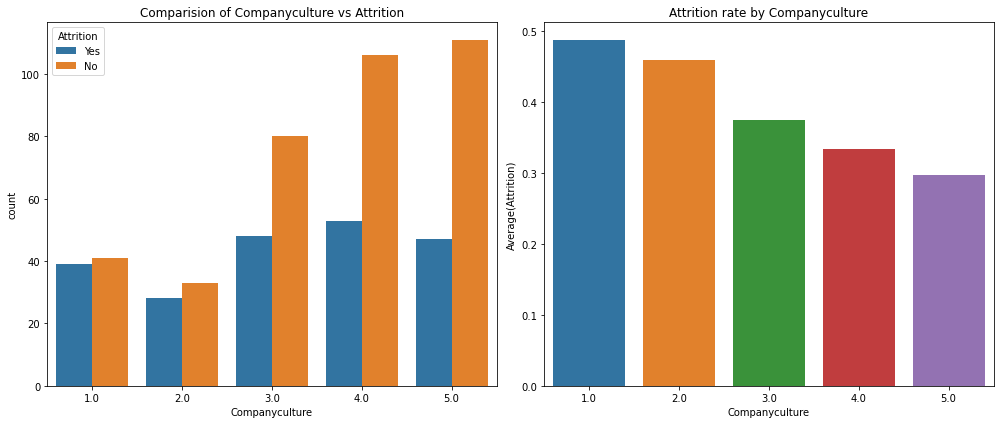

In [95]:
CategoricalVariables_targetPlots(employee_data_filtered,"Companyculture")

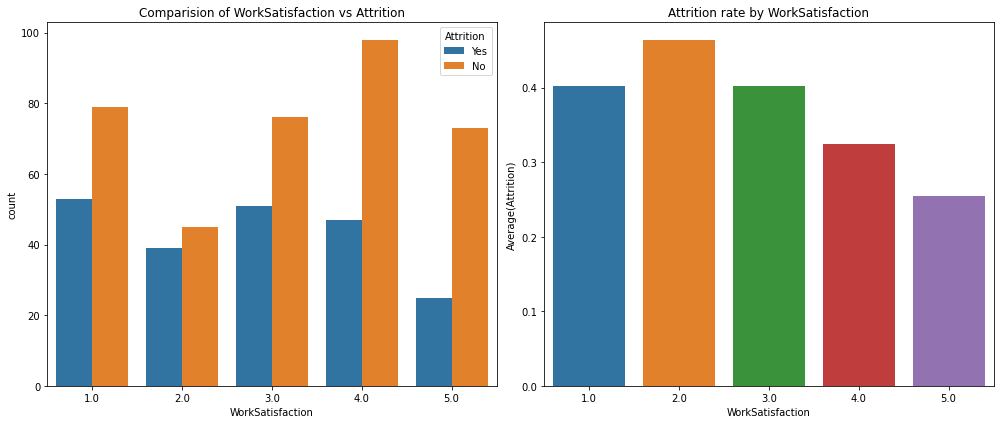

In [96]:
CategoricalVariables_targetPlots(employee_data_filtered,"WorkSatisfaction")

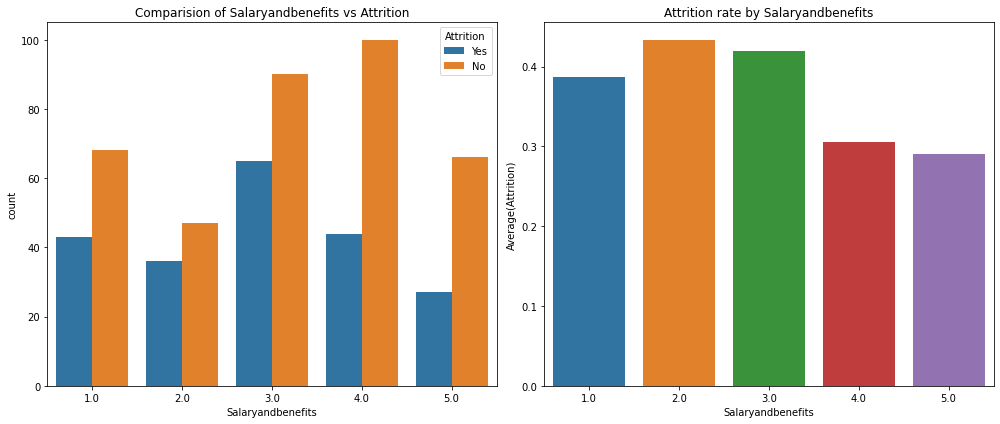

In [97]:
CategoricalVariables_targetPlots(employee_data_filtered,"Salaryandbenefits")

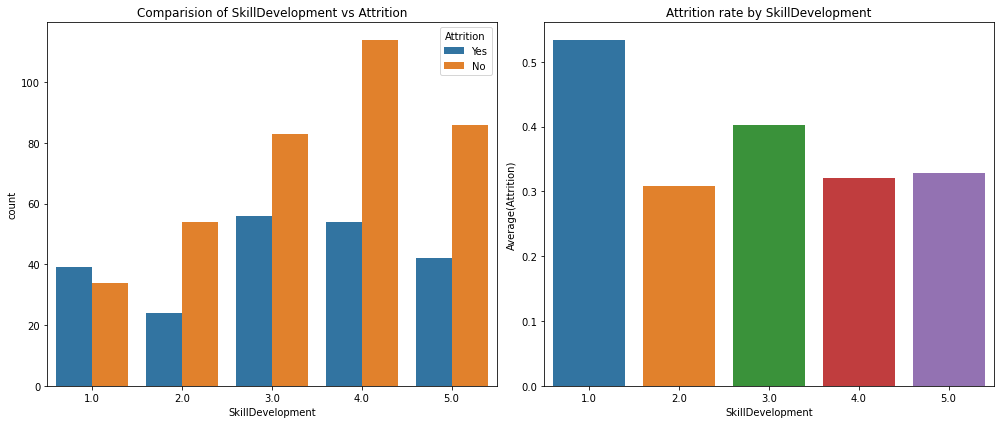

In [98]:
CategoricalVariables_targetPlots(employee_data_filtered,segment_by="SkillDevelopment")

# Work Life Balance

In [99]:
round(employee_data_filtered.Worklifebalance.value_counts()/employee_data.shape[0],2)

4.0    0.24
5.0    0.23
3.0    0.19
1.0    0.15
2.0    0.09
Name: Worklifebalance, dtype: float64

---- 23 % employees found the best work environment
---- 15 % employees found the worst work environment
In total, roughly 66 % people found the work environment to be in between the range average to best.

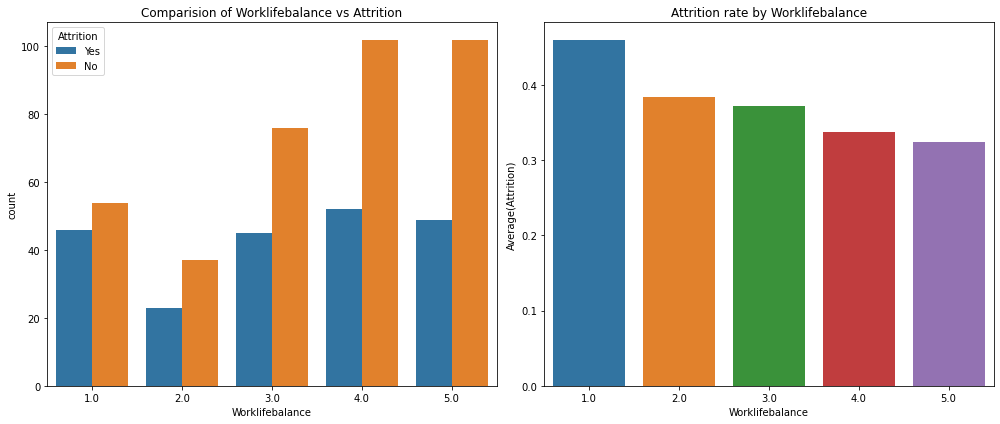

In [101]:
CategoricalVariables_targetPlots(employee_data_filtered,segment_by="Worklifebalance")

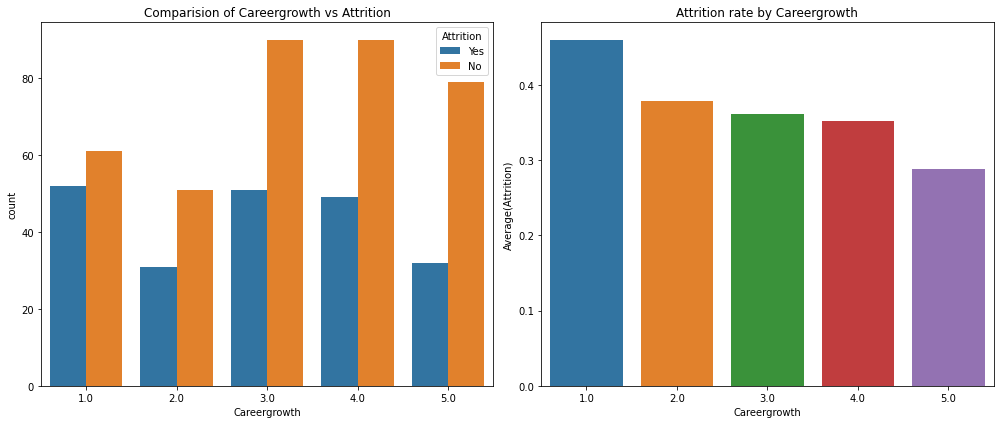

In [102]:
CategoricalVariables_targetPlots(employee_data_filtered,segment_by="Careergrowth")

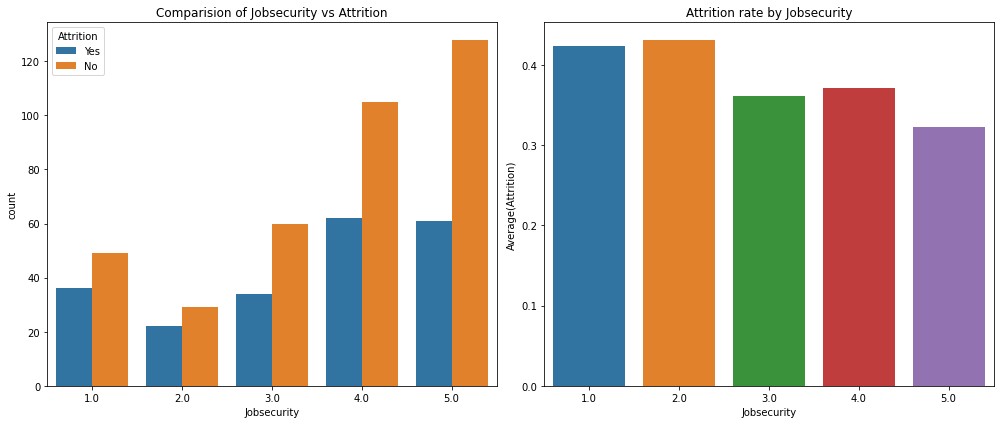

In [103]:
CategoricalVariables_targetPlots(employee_data_filtered,segment_by="Jobsecurity")

In [153]:
#employee_data_filtered.location.value_counts()
employee_data_filtered.nunique()

EmpId                     586
Sr.No                     586
Companyname                26
Companytype                 2
EmployeeID                580
Attrition                   2
EmployeeAge                38
YearsAtCompany             20
Gender                      2
location                   43
EmployeeDepartment         41
JobRole                   367
Review                    555
Careergrowth                5
Jobsecurity                 5
Worklifebalance             5
SkillDevelopment            5
Companyculture              5
WorkSatisfaction            5
Salaryandbenefits           5
OverTime                    2
Worktimingsatisfaction      2
polarity                  182
subjectivity              151
Sentiment                   2
left                        2
dtype: int64

In [34]:
#CategoricalVariables_targetPlots(employee_data_filtered,segment_by="location")

In [35]:
#CategoricalVariables_targetPlots(employee_data_filtered,"JobRole",invert_axis=True)

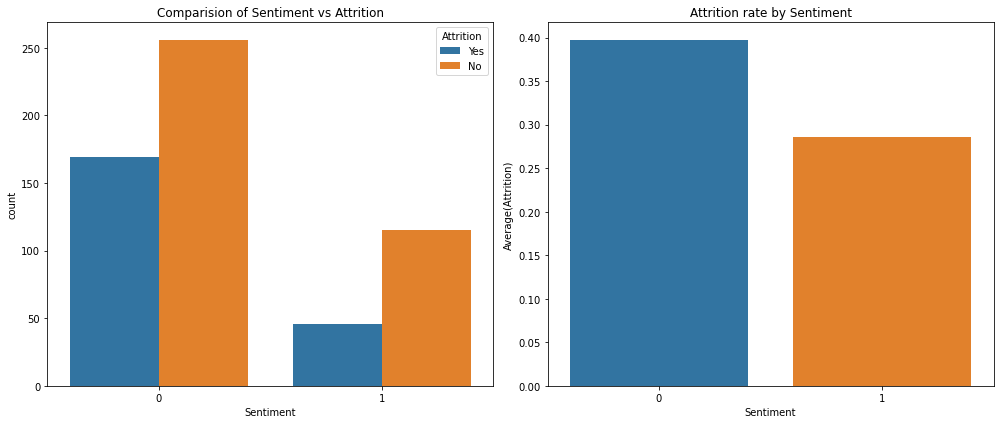

In [105]:
CategoricalVariables_targetPlots(employee_data_filtered,"Sentiment",invert_axis=False)

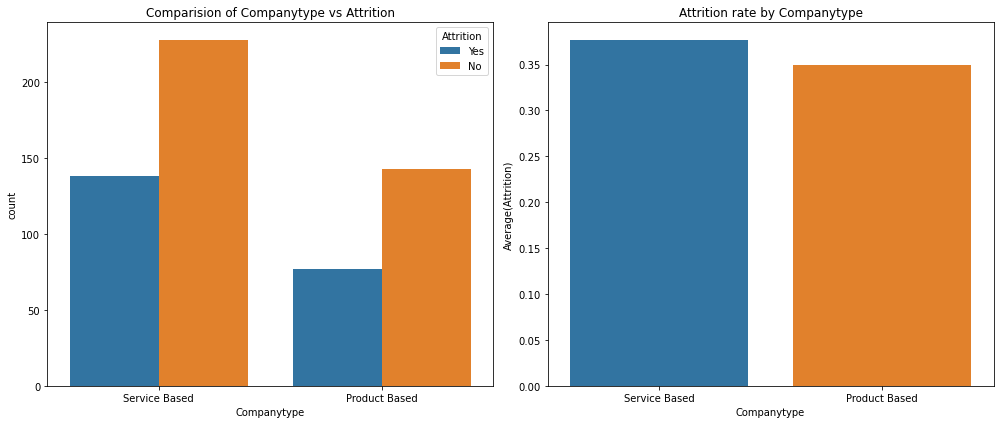

In [106]:
CategoricalVariables_targetPlots(employee_data_filtered,"Companytype",invert_axis=False)

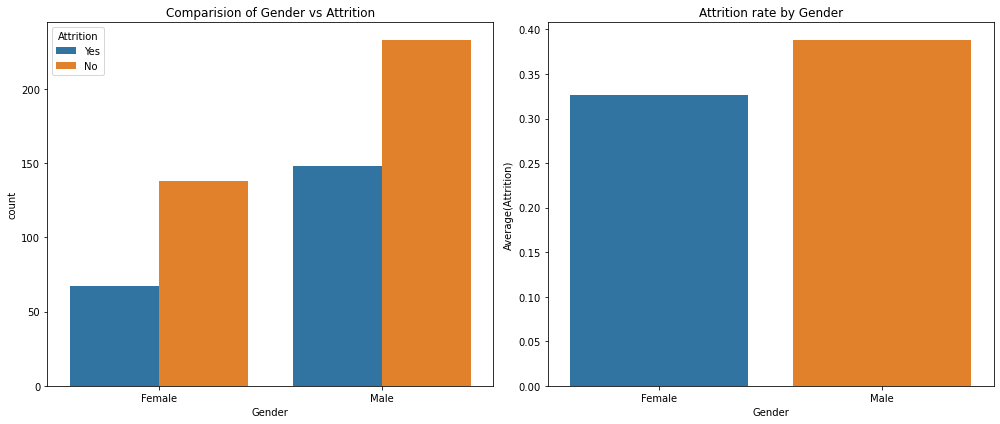

In [107]:
CategoricalVariables_targetPlots(employee_data_filtered,"Gender",invert_axis=False)

In [131]:
employee_data_new = employee_data_filtered.copy()
dict(employee_data_new.dtypes)
numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [132]:
numeric_variable_names

['EmpId',
 'Sr.No',
 'EmployeeID',
 'EmployeeAge',
 'YearsAtCompany',
 'Careergrowth',
 'Jobsecurity',
 'Worklifebalance',
 'SkillDevelopment',
 'Companyculture',
 'WorkSatisfaction',
 'Salaryandbenefits',
 'polarity',
 'subjectivity',
 'Sentiment',
 'left']

In [133]:
categorical_variable_names

['Companyname',
 'Companytype',
 'Attrition',
 'Gender',
 'location',
 'EmployeeDepartment',
 'JobRole',
 'Review',
 'OverTime',
 'Worktimingsatisfaction']

<AxesSubplot:>

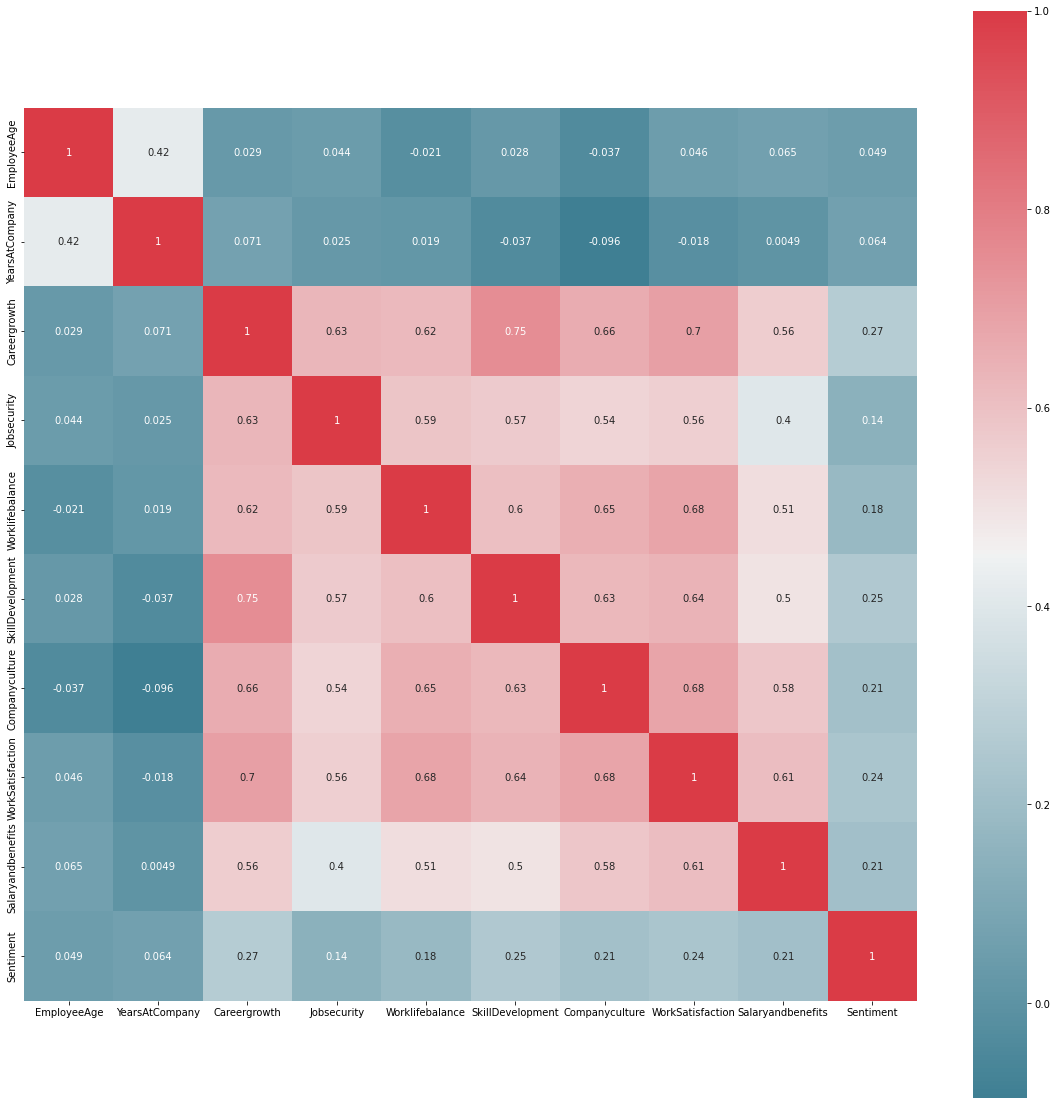

In [134]:
f, ax = plt.subplots(figsize=(20, 20))
X = employee_data_new[['EmployeeAge','YearsAtCompany','Careergrowth','Jobsecurity','Worklifebalance','SkillDevelopment',
                       'Companyculture','WorkSatisfaction','Salaryandbenefits','Companytype','Gender','OverTime',
                       'Worktimingsatisfaction','Sentiment']]
y = employee_data_new['Attrition']
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [147]:
#cor_matrix = X.corr().abs()
#print(cor_matrix)
corr = corr.abs()
upper_tri = corr[np.triu(np.ones(corr.shape),k=1).astype(bool)]
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.65)]
print(to_drop,np.shape(to_drop))
#employee_data_new = employee_data_new.drop(columns = to_drop, axis=1)
#employee_data_new = employee_data_new.drop(columns =['EmpId','Companyname','location','EmployeeDepartment','JobRole','Review'
                                                    #,'polarity','subjectivity','left'] )
#employee_data_new.head()

                   EmployeeAge  YearsAtCompany  Careergrowth  Jobsecurity  \
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
EmployeeAge           1.000000        0.418072      0.028527     0.043673   
YearsAtCompany        0.418072        1.000000      0.071264     0.024700   
YearsAtCompany        0.418072        1.000000      0.071264     0.024700   
YearsAtCompany        0.418072        1.000000      0.071264     0.024700   

Feature: 0, Score: 0.01953
Feature: 1, Score: 0.03347
Feature: 2, Score: 0.05671
Feature: 3, Score: 0.15507
Feature: 4, Score: 0.11362
Feature: 5, Score: 0.13705
Feature: 6, Score: 0.03356
Feature: 7, Score: 0.05093
Feature: 8, Score: 0.17018
Feature: 9, Score: 0.06648
Feature: 10, Score: 0.01885
Feature: 11, Score: 0.09287
Feature: 12, Score: 0.03108
Feature: 13, Score: 0.02059


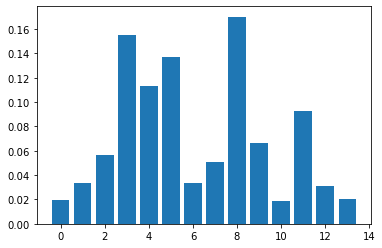

In [112]:
# random forest for feature importance on a regression problem
#feature importance scores using random forests
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=650, n_features=14, n_informative=14, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:>

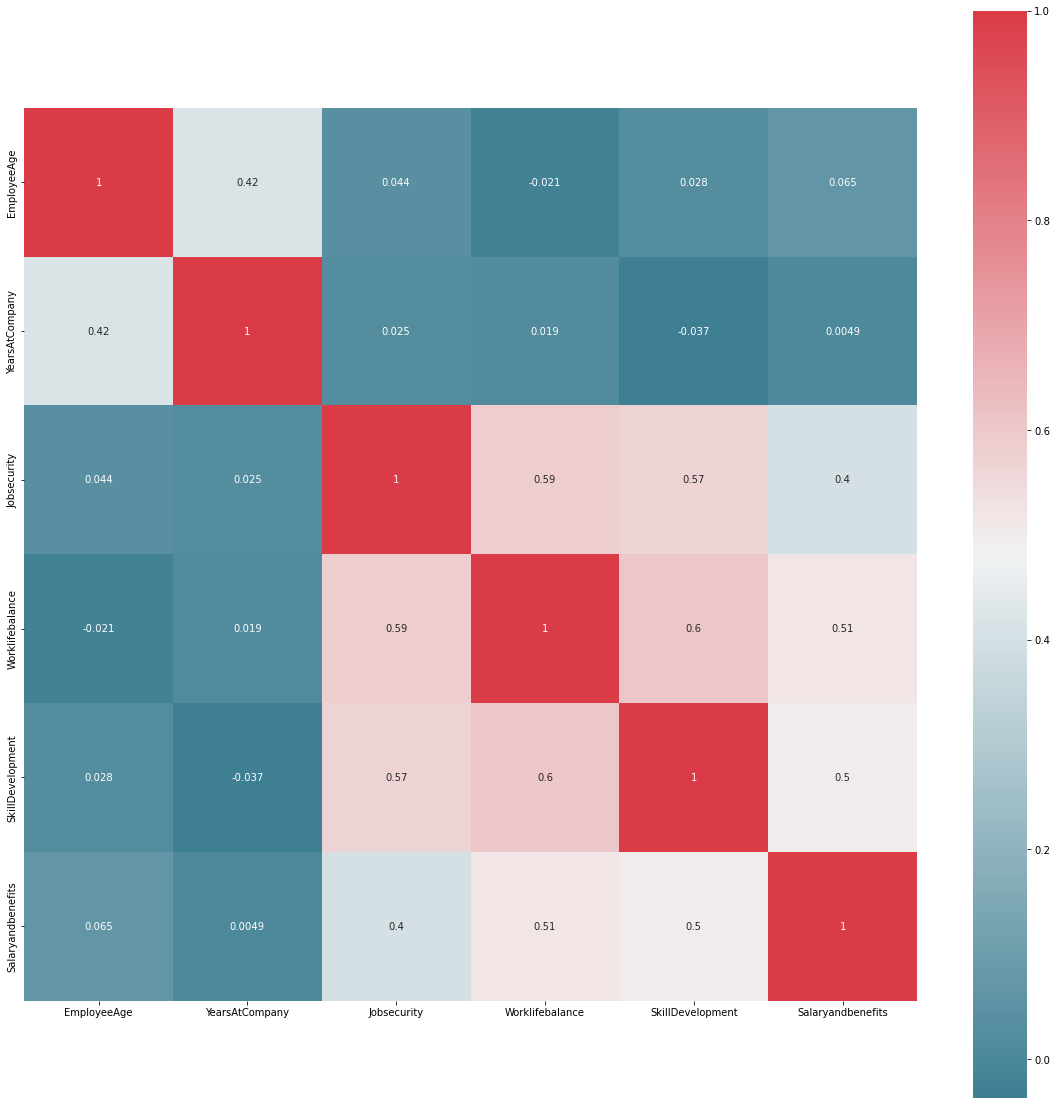

In [113]:
#selecting the highest scores of the features and plotting there correlation using heatmap
f, ax = plt.subplots(figsize=(20, 20))
temp = employee_data_new[['EmployeeAge','YearsAtCompany','Jobsecurity','Worklifebalance','SkillDevelopment','Salaryandbenefits','Companytype','OverTime']]
corr = temp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)


Feature: 0, Score: 0.01348
Feature: 1, Score: 0.37166
Feature: 2, Score: 0.05625
Feature: 3, Score: 0.02821
Feature: 4, Score: 0.01507
Feature: 5, Score: 0.33658
Feature: 6, Score: 0.17874


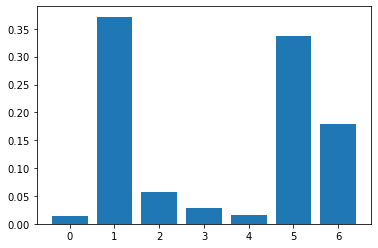

In [114]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
temp, y = make_regression(n_samples=650, n_features=7, n_informative=7, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(temp, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [115]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# X_train, X_test, y_train, y_test = train_test_split(temp, y, random_state=1)
# forest = RandomForestClassifier()
# forest.fit(X_train, y_train)
# y_pred_test = forest.predict(X_test)
# accuracy_score(y_test, y_pred_test)

In [ ]:
#plotting the graph between Employees who left and who stayed.
